In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datahut Qa Assignment/women_dresses_cleaned.csv")
df.head()

,Product Name,Brand,Category Type,MRP (Maximum Retail Price),Discounted Price / Sale Price,Rating,Number of Reviews,Product URL
0,Women Layered Black Knee Length Dress,Deris,Unknown,1299,258,4.2,235,https://www.flipkart.com/neha-fashions-women-l...
1,Women Fit and Flare Red Midi/Calf Length Dress,Stylish Arrow,Midi,999,357,0.0,0,https://www.flipkart.com/stylish-arrow-women-f...
2,Women Gown Maroon Midi/Calf Length Dress,Rangrail,Midi,2499,369,3.6,12,https://www.flipkart.com/rangrail-women-gown-m...
3,Women Fit and Flare Blue Midi/Calf Length Dress,Fashion wear,Midi,999,460,3.9,357,https://www.flipkart.com/fashion2wear-women-fi...
4,Women A-line Gold Midi/Calf Length Dress,Zwerlon,Midi,1999,414,4.1,5344,https://www.flipkart.com/zwerlon-women-a-line-...


# **Data Visualization**


# 1. Histogram – Price Distribution

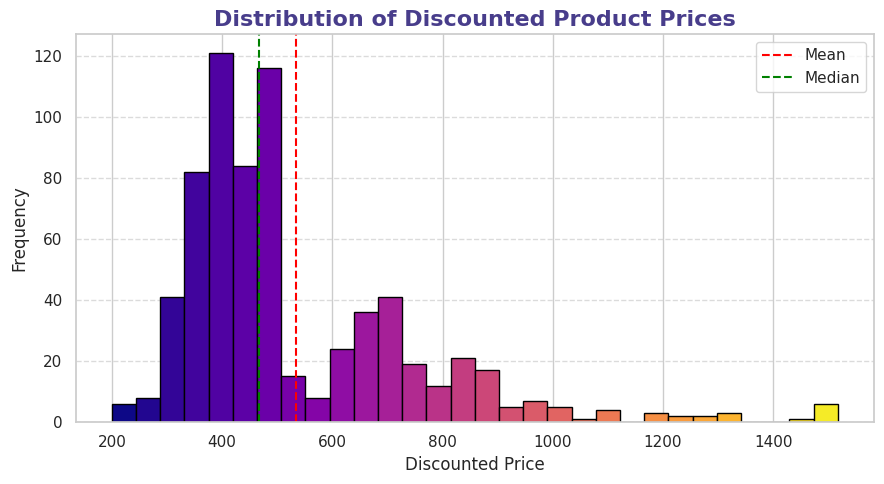

In [ ]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(9,5))

counts, bins, patches = plt.hist(
    df["Discounted Price / Sale Price"],
    bins=30, edgecolor="black"
)

cmap = plt.cm.plasma
norm = plt.Normalize(vmin=min(bins), vmax=max(bins))
for c, p in zip(bins, patches):
    plt.setp(p, 'facecolor', cmap(norm(c)))

plt.axvline(df["Discounted Price / Sale Price"].mean(), color="red", linestyle="dashed", linewidth=1.5, label="Mean")
plt.axvline(df["Discounted Price / Sale Price"].median(), color="green", linestyle="dashed", linewidth=1.5, label="Median")

plt.title("Distribution of Discounted Product Prices", fontsize=16, weight="bold", color="darkslateblue")
plt.xlabel("Discounted Price", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()
plt.tight_layout()
plt.savefig("histogram_prices.png", dpi=300)
plt.show()

# 2. Bar Chart –  Average discount percentage by brand.

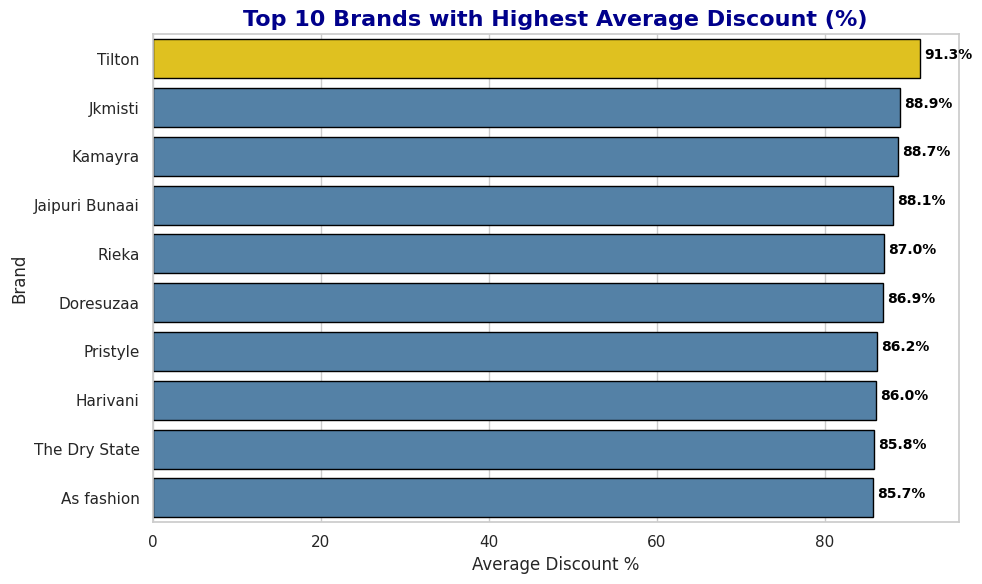

In [ ]:
if "Discount %" not in df.columns:
    df["Discount %"] = ((df["MRP (Maximum Retail Price)"] - df["Discounted Price / Sale Price"]) / df["MRP (Maximum Retail Price)"]) * 100

# Top 10 brands by average discount
avg_discount = df.groupby("Brand")["Discount %"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))


colors = ["#FFD700"] + ["#4682B4"]*(len(avg_discount)-1)

sns.barplot(
    y=avg_discount.index,
    x=avg_discount.values,
    hue=avg_discount.index,
    dodge=False,
    legend=False,
    palette=colors,
    edgecolor="black"
)
plt.title("Top 10 Brands with Highest Average Discount (%)", fontsize=16, weight="bold", color="darkblue")
plt.xlabel("Average Discount %", fontsize=12)
plt.ylabel("Brand", fontsize=12)

for i, v in enumerate(avg_discount.values):
    plt.text(v + 0.5, i, f"{v:.1f}%", ha="left", fontsize=10, color="black", weight="bold")

plt.tight_layout()
plt.savefig("bar_top_discount.png", dpi=300)
plt.show()


# 3. Box Plot – Price Distribution across Category

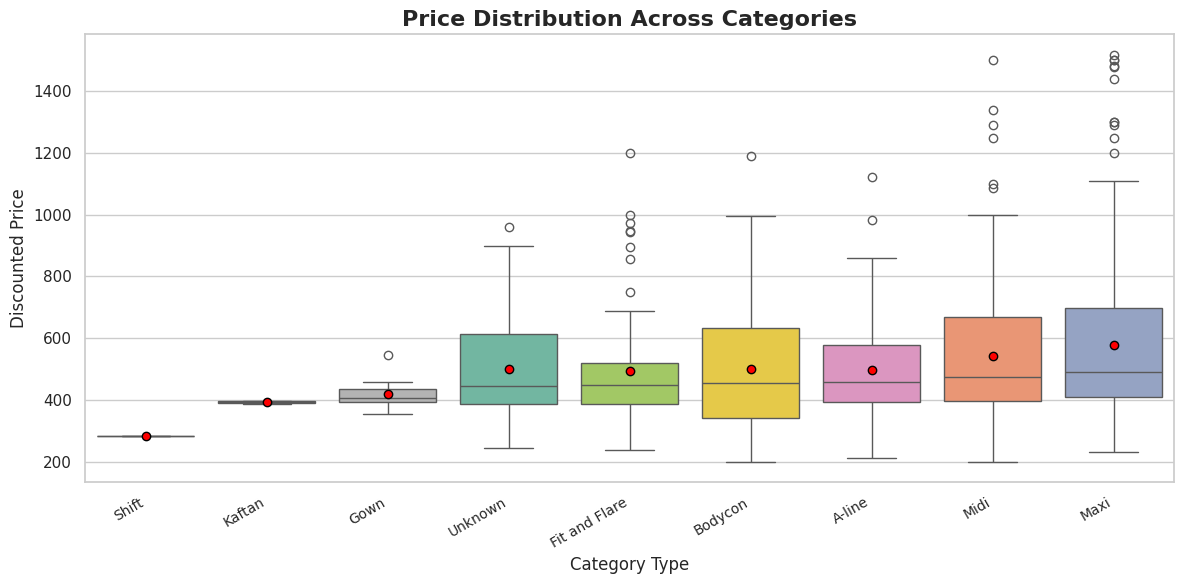

In [ ]:
order = df.groupby("Category Type")["Discounted Price / Sale Price"].median().sort_values().index

plt.figure(figsize=(12,6))
sns.boxplot(
    x="Category Type",
    y="Discounted Price / Sale Price",
    data=df,
    order=order,
    hue="Category Type",
    legend=False,
    palette="Set2",
    showmeans=True,
    meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"black"}
)
plt.title("Price Distribution Across Categories", fontsize=16, weight="bold")
plt.xticks(rotation=30, ha="right", fontsize=10)
plt.ylabel("Discounted Price", fontsize=12)
plt.xlabel("Category Type", fontsize=12)
plt.tight_layout()
plt.savefig("boxplot_prices.png", dpi=300)
plt.show()


# 4. Scatter plot – Ratings vs Discount Percentage.

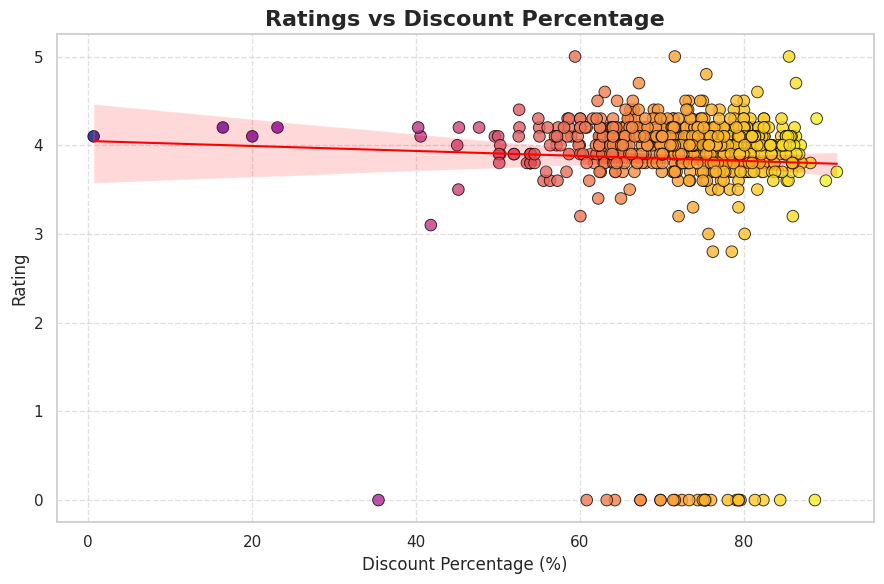

In [ ]:
plt.figure(figsize=(9,6))
sns.scatterplot(
    x="Discount %", y="Rating", data=df,
    hue="Discount %", palette="plasma",
    alpha=0.8, s=70, edgecolor="black"
)


sns.regplot(x="Discount %", y="Rating", data=df, scatter=False, color="red", line_kws={"linewidth":1.5})

plt.title("Ratings vs Discount Percentage", fontsize=16, weight="bold")
plt.xlabel("Discount Percentage (%)", fontsize=12)
plt.ylabel("Rating", fontsize=12)
plt.grid(linestyle="--", alpha=0.6)
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.savefig("scatter_rating_discount.png", dpi=300)
plt.show()